This block involves training separate Markov chain models on Pride and Prejudice and Frankenstein to generate synthetic sentences. After preprocessing and balancing the data, unigram to trigram features are extracted using a CountVectorizer to build a labeled dataset. Multiple classifiers, Naive Bayes, Logistic Regression, SVM, Decision Tree, and Random Forest are trained to distinguish between the generated sentences. Each model's performance is evaluated using accuracy, precision, recall, F1-score, and confusion matrices, with training and testing results compared to assess generalization.


Naive Bayes Results:
Train Accuracy: 0.9931
Test Accuracy: 0.9100
Precision: 0.9558
Recall: 0.8607
F1: 0.9058


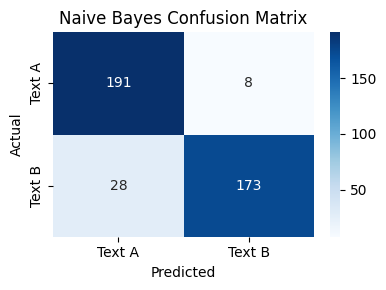


Logistic Regression Results:
Train Accuracy: 0.9981
Test Accuracy: 0.8425
Precision: 0.8876
Recall: 0.7861
F1: 0.8338


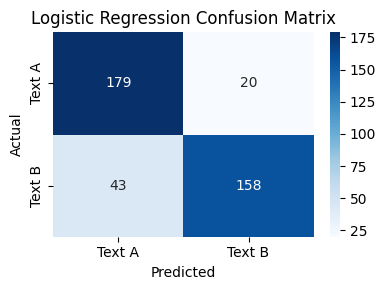


SVM Results:
Train Accuracy: 0.9838
Test Accuracy: 0.7600
Precision: 0.7536
Recall: 0.7761
F1: 0.7647


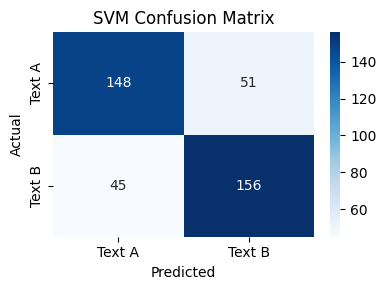


Decision Tree Results:
Train Accuracy: 0.9994
Test Accuracy: 0.7100
Precision: 0.8148
Recall: 0.5473
F1: 0.6548


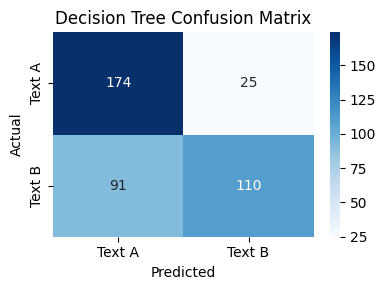


Random Forest Results:
Train Accuracy: 0.9994
Test Accuracy: 0.7600
Precision: 0.9008
Recall: 0.5871
F1: 0.7108


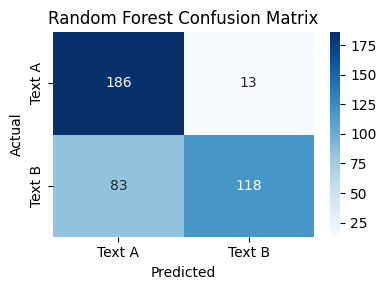

In [ ]:
!pip install markovify
import markovify
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load texts
def load_text(file_path):
    with open(file_path, encoding="utf-8") as f:
        return f.read()

text_a = load_text("1342-0.txt")
text_b = load_text("84-0.txt")

# Train Markov models
def train_markov_model(text, state_size=2):
    return markovify.Text(text, state_size=state_size)

model_a = train_markov_model(text_a, state_size=2)
model_b = train_markov_model(text_b, state_size=2)

# Generate sentences
def generate_sentence(model, retries=5):
    for _ in range(retries):
        sentence = model.make_sentence(tries=100)
        if sentence:
            return sentence
    return None

# Preprocess text
def preprocess_text(text):
    if text is None:
        return ""
    return re.sub(r"[^a-z\s]", "", text.lower())

# Generate dataset
num_samples = 1000
sentences_a = [preprocess_text(generate_sentence(model_a)) for _ in range(num_samples)]
sentences_b = [preprocess_text(generate_sentence(model_b)) for _ in range(num_samples)]

# Clean dataset
sentences_a = [s for s in sentences_a if s]
sentences_b = [s for s in sentences_b if s]
min_len = min(len(sentences_a), len(sentences_b))
sentences_a, sentences_b = sentences_a[:min_len], sentences_b[:min_len]

labels = [0] * min_len + [1] * min_len
data = sentences_a + sentences_b

# Feature extraction
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(data)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Define classifiers including Random Forest
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate and display results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    results[name] = {
        "Train Accuracy": accuracy_score(y_train, train_preds),
        "Test Accuracy": accuracy_score(y_test, test_preds),
        "Precision": precision_score(y_test, test_preds, zero_division=0),
        "Recall": recall_score(y_test, test_preds, zero_division=0),
        "F1": f1_score(y_test, test_preds, zero_division=0)
    }

    print(f"\n{name} Results:")
    for metric, score in results[name].items():
        print(f"{metric}: {score:.4f}")

    cm = confusion_matrix(y_test, test_preds)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Text A", "Text B"], yticklabels=["Text A", "Text B"])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


This block uses an LSTM-based neural network to classify sentences generated by Markov models trained on Pride and Prejudice and Frankenstein. The sentences are preprocessed, tokenized, and padded before being fed into a sequential model with an embedding layer, LSTM, dense layers, and dropout for regularization. After training on labeled data, the model is evaluated on a test set, and its classification accuracy is reported to compare with traditional machine learning models.

In [ ]:
import os
import re
import numpy as np
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Preprocess text
def preprocess_text(text):
    return re.sub(r"[^a-z\s]", "", text.lower()) if text else ""

# Generate and preprocess sentences
num_samples = 1000
sentences_a = [preprocess_text(generate_sentence(model_a)) for _ in range(num_samples)]
sentences_b = [preprocess_text(generate_sentence(model_b)) for _ in range(num_samples)]

sentences_a = [s for s in sentences_a if s]
sentences_b = [s for s in sentences_b if s]
min_len = min(len(sentences_a), len(sentences_b))
sentences_a, sentences_b = sentences_a[:min_len], sentences_b[:min_len]

data = sentences_a + sentences_b
labels = [0] * min_len + [1] * min_len

# Tokenize and pad
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
X = pad_sequences(sequences)
y = to_categorical(labels)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 493ms/step - accuracy: 0.5710 - loss: 0.6792 - val_accuracy: 0.7950 - val_loss: 0.4835
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 502ms/step - accuracy: 0.8766 - loss: 0.3208 - val_accuracy: 0.8825 - val_loss: 0.2667
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 505ms/step - accuracy: 0.9608 - loss: 0.1037 - val_accuracy: 0.8825 - val_loss: 0.2810
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 495ms/step - accuracy: 0.9852 - loss: 0.0399 - val_accuracy: 0.9225 - val_loss: 0.2156
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 470ms/step - accuracy: 0.9957 - loss: 0.0130 - val_accuracy: 0.9150 - val_loss: 0.2668
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9205 - loss: 0.2746
Test Accuracy: 0.9150
